# DATA DESCRIPTION

🔢 General Info:
Total Records: 2,149 patients

Total Features (Columns): 35

No missing values in any column

Target Variable: Diagnosis (0 = No Alzheimer's, 1 = Alzheimer's)

🧠 Column Overview:
Demographics & Lifestyle
PatientID: Unique ID

Age: Patient's age (60–90)

Gender: 0 = Female, 1 = Male

Ethnicity: Coded as integers (0–3)

EducationLevel: Ordinal (0 = low to 3 = high)

BMI: Body Mass Index

Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality: Lifestyle indicators

Medical History
FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension: Binary indicators (0 = No, 1 = Yes)

SystolicBP, DiastolicBP: Blood pressure

CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides: Cholesterol levels

Cognitive & Functional Scores
MMSE: Mini Mental State Examination score

FunctionalAssessment, ADL: Activity of Daily Living scores

MemoryComplaints, BehavioralProblems, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness: Binary indicators of symptoms

Others
DoctorInCharge: Same for all patients (XXXConfid)

# IMPORTING BASIC LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# LOAD THE DATASET

In [2]:
data = pd.read_table(r"C:\Users\Pragya\Downloads\archive (1)\alzheimers_disease_data.csv",delimiter=",")
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682564,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407995,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# EDA

**1. HEAD**

In [4]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682564,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407995,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**2. TAIL**

In [5]:
data.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,9.878711,0,0,0,0,0,0,166,78,283.396797,92.200064,81.920043,217.396873,11.114777,6.307543,0,1,8.327563,0,1,0,0,1,0,XXXConfid


**3. COLUMNS**

In [6]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

**4. SHAPE**

In [7]:
data.shape

(2149, 35)

**5. DESCRIBE**

In [8]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993353,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**6. INFO**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**7. DATA TYPES**

In [10]:
data.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

**8. MISSING VALUES**

In [11]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

**9. ANAMOLY DETECTION**

In [12]:
for i in data.columns:
    print({i:data[i].unique()})


{'PatientID': array([4751, 4752, 4753, ..., 6897, 6898, 6899], dtype=int64)}
{'Age': array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76],
      dtype=int64)}
{'Gender': array([0, 1], dtype=int64)}
{'Ethnicity': array([0, 3, 1, 2], dtype=int64)}
{'EducationLevel': array([2, 0, 1, 3], dtype=int64)}
{'BMI': array([22.92774923, 26.82768119, 17.79588244, ..., 15.47647896,
       15.29991122, 33.28973831])}
{'Smoking': array([0, 1], dtype=int64)}
{'AlcoholConsumption': array([13.29721773,  4.54252382, 19.55508453, ...,  4.59467018,
        8.67450518,  7.89070315])}
{'PhysicalActivity': array([6.32711247, 7.61988454, 7.84498779, ..., 9.88600229, 6.35428175,
       6.57099338])}
{'DietQuality': array([1.34721431, 0.51876714, 1.82633467, ..., 8.12002455, 1.26342749,
       7.94140388])}
{'SleepQuality': array([9.02567867, 7.15129274, 9.67357416, ..., 5.76946355, 8.32287396,
       9.87871052])}
{'FamilyHistor

**10. DUPLICATED VALUES**

In [13]:
data.duplicated().sum()

0

# DATA VISUALIZATION

**📊 1. Age vs Diagnosis**

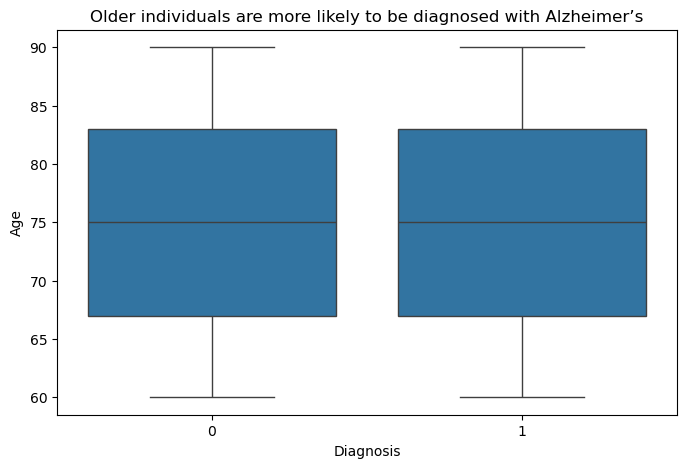

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='Age', data=data)
plt.title('Older individuals are more likely to be diagnosed with Alzheimer’s')
plt.show()

Insight: Alzheimer’s is generally age-related. This plot shows that individuals with a positive diagnosis (Diagnosis = 1) tend to have a higher average age.










**🧠 2. MMSE Score vs Diagnosis**

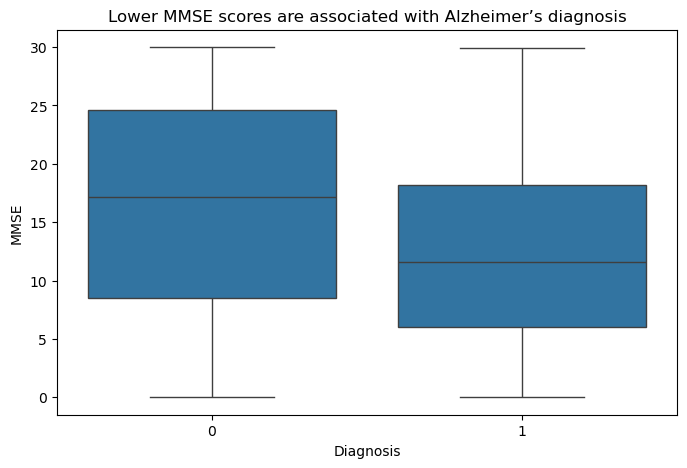

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='MMSE', data=data)
plt.title('Lower MMSE scores are associated with Alzheimer’s diagnosis')
plt.show()

Insight: A low MMSE score indicates cognitive decline – Alzheimer’s patients usually have lower scores.










**🧓 3. ADL vs Diagnosis**

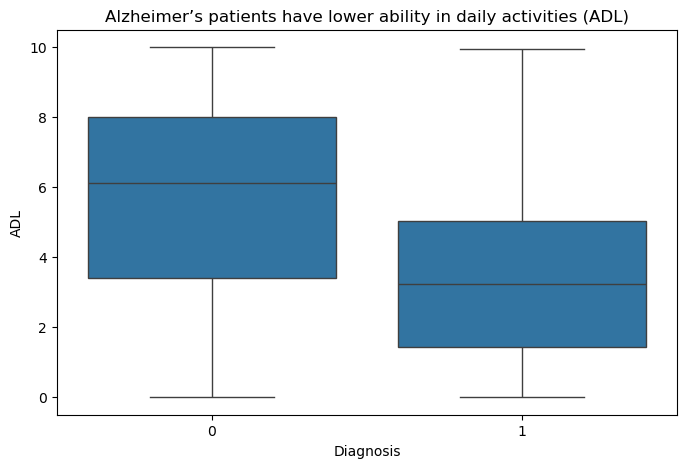

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis', y='ADL', data=data)
plt.title('Alzheimer’s patients have lower ability in daily activities (ADL)')
plt.show()


Insight: Low ADL (Activities of Daily Living) means the patient has difficulty performing daily tasks – people with diagnosis = 1 generally have lower ADL scores.










**🧩 4. Memory Complaints vs Diagnosis**

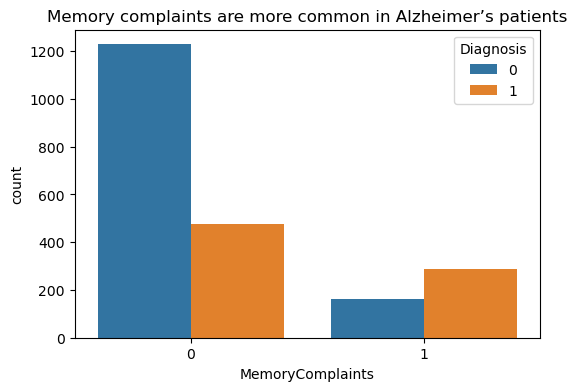

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=data)
plt.title('Memory complaints are more common in Alzheimer’s patients')
plt.show()


Insight: People who have memory complaints are more likely to be diagnosed with Alzheimer’s – this countplot visually shows that correlation.









# DATA PREPROCESSING

**FEATURE SELECTION**

In [14]:
data.drop(['PatientID','DoctorInCharge'],axis=1,inplace=True)

**CONVERTING CATEGORICAL DATA TO NUMERICAL DATA**

In [15]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
print(colname)



# appliying fit transform method to all the columns (transform_method) i.e categorical to numerical
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data[x]=le.fit_transform(data[x])
    

[]


**CREATING X AND Y**

In [16]:
X = data.loc[:,['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness']]
Y = data.loc[:,'Diagnosis']


**SCALING**

In [17]:
# for scaling i go for StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()     # ........... do not run this code for test data

scaler.fit(X)                 # .............. do not run this code for test data only use step of transform
scaler.transform(X)       # here we are not using reshape(-1,1) because our X variable is alredy in 2d format

#x = scaler.fit_transform(X)  
#print(X)

array([[-0.21236841, -1.01264391, -0.70040826, ..., -0.42134813,
         2.30261868, -0.65704809],
       [ 1.56775727, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.21236841, -1.01264391,  2.31195467, ..., -0.42134813,
         2.30261868, -0.65704809],
       ...,
       [ 0.23266301, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815, -0.65704809],
       [ 0.34392086,  0.98751396,  2.31195467, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.32362627, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861]])

**SPLITTING THE DATA**

In [18]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 10)  

**CHECKING DATA DISTRIBUTION**

In [19]:
data['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

My data is imbalance in order to make it balance i am using Oversampling.

**SMOTE**

In [20]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))


Before OverSampling, counts of label '1':  530
Before OverSampling, counts of label '0':  974
After OverSampling, the shape of train_X:  (1948, 32)
After OverSampling, the shape of train_y:  (1948,)
After OverSampling, counts of label '1':  974
After OverSampling, counts of label '0':  974


# MODEL BUILDING

**LOGISTIC REGRESSION**

In [21]:
# CREATING MODEL OBJECT

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=10)

In [22]:
# FITTING MODEL OBJECT
classifier.fit(X_train_res,Y_train_res)

LogisticRegression(random_state=10)

In [23]:
# PARAMETERS 
print(classifier.intercept_)   # intercept is beta-not
print(classifier.coef_)     # coef is beta-1,beta-2

[0.08441171]
[[ 2.18197174e-02 -2.45768890e-01 -1.83714365e-01 -4.37148572e-01
   2.79809339e-02 -4.06073313e-01 -4.09675099e-02  1.38962743e-01
   3.73639416e-02  1.07320051e-02 -3.21796127e-01 -1.28851476e-01
  -1.79370054e-01 -2.11836485e-01 -1.81043979e-01 -1.72283170e-01
   2.53194269e-03  3.19167521e-03  1.37688094e-03 -1.03906672e-03
   7.55833821e-03  6.18036045e-06 -4.10991459e-02 -3.41914533e-01
   7.34005116e-01  4.98755475e-01 -2.54932871e-01 -3.35665405e-01
  -2.73005080e-01 -1.83322510e-01 -7.20214113e-02 -3.51409438e-01]]


In [24]:
# PREDICTION ON X_TEST
Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 1 0 

In [25]:
# COMPARISION(ACTUAL V/S PREDICTED)
# print(list(zip(Y_test,Y_pred)))

In [26]:
# EVALUATION MATRIX
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


[[333  82]
 [ 61 169]]
0.7782945736434108
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       415
           1       0.67      0.73      0.70       230

    accuracy                           0.78       645
   macro avg       0.76      0.77      0.76       645
weighted avg       0.78      0.78      0.78       645



# PRUNNING LOGISTIC REGRESSION

In [27]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)


y_pred_class = []
for value in y_pred_prob[:,1]:
    if value >0.3:                         # agar value 0.5 se jayada h to consider as 1
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)              # agar value 0.5 se kum h to consider as 0

#print(y_pred_class)


# EVALUATION
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
# confusion matrix
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))


# accuracy_score
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[0.48274122 0.51725878]
 [0.39430287 0.60569713]
 [0.18836547 0.81163453]
 ...
 [0.96015833 0.03984167]
 [0.91500921 0.08499079]
 [0.88528288 0.11471712]]
[[254 161]
 [ 24 206]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       415
           1       0.56      0.90      0.69       230

    accuracy                           0.71       645
   macro avg       0.74      0.75      0.71       645
weighted avg       0.79      0.71      0.72       645

Accuracy of the model:  0.7131782945736435


0.8379151388161341


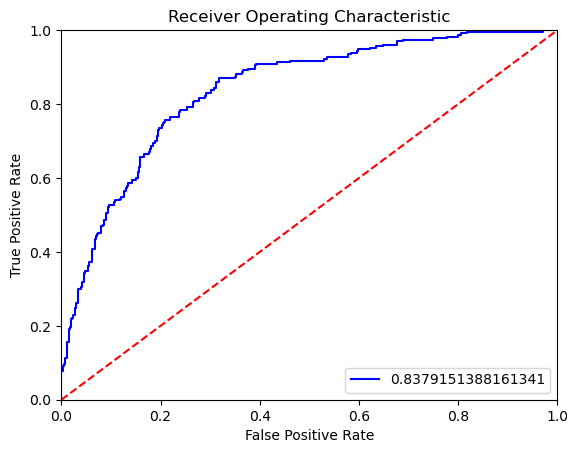

In [28]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])    
auc = metrics.auc(fpr,tpr)     # fpr = false positive rate ,# tpr = true positive rate
 
print(auc)
# auc = are under curve, jiska area jayada h vo aacha h
# if auc = 0.5 (worst model)
# if auc = 0.5 to 0.6 ( poor model)
# if auc = 0.6 to 0.7 (bad model)
# if auc = 0.7 to 0.8 (good model)
# if auc = 0.8 to 0.9 (very.good model)
# if auc = 0.9 to 1.0 (excellent model)
# so, our model is very good model


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)   
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()


# DECISION TREE

In [29]:
# CREATING MODEL OBJECT
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10, 
                                         criterion="gini")

In [30]:
# FITTING MODEL OBEJCT
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)

In [31]:
# COMPARISION(ACTUAL V/S PREDICTED)
# print(list(zip(Y_test,Y_pred)))

In [32]:
# EVALUATION MATRIX
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

model_DT.score(X_train,Y_train)

[[371  44]
 [ 28 202]]
0.8883720930232558
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       415
           1       0.82      0.88      0.85       230

    accuracy                           0.89       645
   macro avg       0.88      0.89      0.88       645
weighted avg       0.89      0.89      0.89       645



1.0

In [33]:
# CONTRIBUTION
model_DT.feature_importances_

array([0.00680504, 0.00145674, 0.00509567, 0.00388465, 0.01516972,
       0.0028252 , 0.00940641, 0.01277169, 0.01756136, 0.00492462,
       0.00145674, 0.        , 0.00084449, 0.        , 0.        ,
       0.        , 0.00971162, 0.00395402, 0.00863939, 0.0170677 ,
       0.0155304 , 0.01232207, 0.20057053, 0.17200814, 0.12458125,
       0.1141916 , 0.23515972, 0.        , 0.        , 0.        ,
       0.0021189 , 0.00194232])

In [34]:
# PARAMETER WITH THEIR IMPORTANCE
print(list(zip(data.columns[0:-1],
               model_DT.feature_importances_)))

[('Age', 0.006805044832723384), ('Gender', 0.0014567432490023634), ('Ethnicity', 0.005095672469737792), ('EducationLevel', 0.0038846486640063023), ('BMI', 0.015169719929614823), ('Smoking', 0.0028251990283682206), ('AlcoholConsumption', 0.009406411293427576), ('PhysicalActivity', 0.01277168876742511), ('DietQuality', 0.017561355691371225), ('SleepQuality', 0.004924623122518683), ('FamilyHistoryAlzheimers', 0.0014567432490023634), ('CardiovascularDisease', 0.0), ('Diabetes', 0.000844488840001371), ('Depression', 0.0), ('HeadInjury', 0.0), ('Hypertension', 0.0), ('SystolicBP', 0.009711621660015756), ('DiastolicBP', 0.003954017390149274), ('CholesterolTotal', 0.008639388295873105), ('CholesterolLDL', 0.017067698025928335), ('CholesterolHDL', 0.015530402965383695), ('CholesterolTriglycerides', 0.012322074401944588), ('MMSE', 0.20057053153148685), ('FunctionalAssessment', 0.17200813664407508), ('MemoryComplaints', 0.12458125385329633), ('BehavioralProblems', 0.1141915961655828), ('ADL', 0.2

In [35]:
# CREATING DATA FRAME
sample=pd.DataFrame()

sample["Column"]=data.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_

sample.sort_values("Imp value",ascending=False)

,Column,Imp value
26,ADL,0.235160
22,MMSE,0.200571
23,FunctionalAssessment,0.172008
24,MemoryComplaints,0.124581
25,BehavioralProblems,0.114192
8,DietQuality,0.017561
19,CholesterolLDL,0.017068
20,CholesterolHDL,0.015530
4,BMI,0.015170
7,PhysicalActivity,0.012772


MODEL IS OVERFITTED SO I AM PRUNNING IT

# PRUNNING DECISION TREE

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Grid Search parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Accuracy on Test Set:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Accuracy on Test Set: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       415
           1       0.93      0.92      0.92       230

    accuracy                           0.94       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.94      0.94      0.94       645



# RANDOM FOREST

In [37]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,
                                          random_state=10, bootstrap=True,
                                         n_jobs=-1)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[404  11]
 [ 30 200]]
0.9364341085271318
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       415
           1       0.95      0.87      0.91       230

    accuracy                           0.94       645
   macro avg       0.94      0.92      0.93       645
weighted avg       0.94      0.94      0.94       645



In [38]:
sample=pd.DataFrame()

sample["Column"]=data.columns[0:-1]
sample["Imp value"]=model_RandomForest.feature_importances_

sample.sort_values("Imp value",ascending=False)

,Column,Imp value
23,FunctionalAssessment,0.176141
26,ADL,0.165895
22,MMSE,0.119279
24,MemoryComplaints,0.078398
25,BehavioralProblems,0.040223
9,SleepQuality,0.034170
21,CholesterolTriglycerides,0.031762
7,PhysicalActivity,0.031397
8,DietQuality,0.031334
19,CholesterolLDL,0.031125


# PRUNNING RANDOM FOREST

In [40]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and print them
print("Best Parameters: ", grid_search.best_params_)

# Use the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9318
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       415
           1       0.95      0.86      0.90       230

    accuracy                           0.93       645
   macro avg       0.94      0.92      0.92       645
weighted avg       0.93      0.93      0.93       645



# EXTRA TREES

In [41]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier(n_estimators=300, random_state=10, bootstrap=True)

#fit the model on the data and predict the values
model_EXT.fit(X_train,Y_train)

Y_pred=model_EXT.predict(X_test)



from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[394  21]
 [ 68 162]]
0.862015503875969
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# PRUNNING EXTRA TREES

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

model_EXT=ExtraTreesClassifier( random_state=10, bootstrap=True) #fixed parameters should be passsed here

#parameters for trial and error should be passed here
parameter_space = {
    'n_estimators':[100,300,500,1000],       #np.arange(100, 1001,50),
    'max_depth':[10,15,8, 12],
    'min_samples_leaf':[1,3,4,5,6,7]
    }
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf = GridSearchCV(model_EXT, parameter_space, n_jobs=-1, cv=5)


clf.fit(X_train,Y_train)


print('Best parameters found:\n', clf.best_params_)


clf.best_score_

Best parameters found:
 {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 500}


0.8424097452934663

# ADA BOOST

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the base classifier (DecisionTreeClassifier)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoostClassifier
ada_boost = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the model to the training data
ada_boost.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(Y_test,Y_pred))

Accuracy: 0.8961
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# GRADIENT BOOSTING

In [48]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Accuracy: 0.9488
[[394  21]
 [ 68 162]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# GRADIENT BOOSTING WITH GRIDSEARCH

In [52]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 1.0],  # Subsample ratio of the training set
}

# Initialize GridSearchCV with XGBoostClassifier and the parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and print them
print("Best Parameters: ", grid_search.best_params_)

# Use the best model to make predictions
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
[[394  21]
 [ 68 162]]
0.862015503875969
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# XG BOOSTING

In [49]:
# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate
    max_depth=3,  # Depth of trees
    random_state=42
)

# Fit the model to the training data
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[394  21]
 [ 68 162]]
0.862015503875969
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# XG BOOST WITH GRID SEARCH

In [51]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 1.0],  # Subsample ratio of the training set
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when building each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}

# Initialize GridSearchCV with XGBoostClassifier and the parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and print them
print("Best Parameters: ", grid_search.best_params_)

# Use the best model to make predictions
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model's performance
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
[[394  21]
 [ 68 162]]
0.862015503875969
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       415
           1       0.89      0.70      0.78       230

    accuracy                           0.86       645
   macro avg       0.87      0.83      0.84       645
weighted avg       0.86      0.86      0.86       645



# CONCLUSION

Out of all the models prunned decision tree gives the highest accuracy:-

Accuracy on Test Set: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       415
           1       0.93      0.92      0.92       230

    accuracy                           0.94       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.94      0.94      0.94       645